# K-means clustering with scikit-learn

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['C'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),C
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


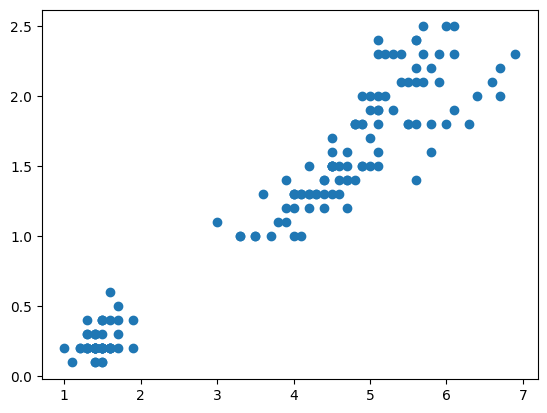

In [2]:
import matplotlib.pyplot as plt

plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(iris_df[['petal length (cm)', 'petal width (cm)']])

In [4]:
cluster_preds = km.predict(iris_df[['petal length (cm)', 'petal width (cm)']])
iris_df['cluster'] = cluster_preds
print(iris_df['cluster'].unique())
iris_df.head()

[1 2 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),C,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [5]:
df1 = iris_df[iris_df.cluster == 0]
df2 = iris_df[iris_df.cluster == 1]
df3 = iris_df[iris_df.cluster == 2]

In [6]:
df1.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),C,cluster
101,5.8,2.7,5.1,1.9,2,0
109,7.2,3.6,6.1,2.5,2,0
132,6.4,2.8,5.6,2.2,2,0
114,5.8,2.8,5.1,2.4,2,0
122,7.7,2.8,6.7,2.0,2,0
112,6.8,3.0,5.5,2.1,2,0
149,5.9,3.0,5.1,1.8,2,0
104,6.5,3.0,5.8,2.2,2,0
118,7.7,2.6,6.9,2.3,2,0
110,6.5,3.2,5.1,2.0,2,0


In [7]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

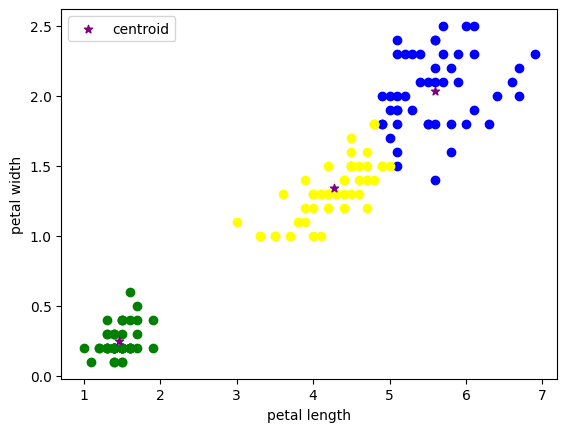

In [8]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='green')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='yellow')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],color='purple',
            marker='*', label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

## Elbow plot

Deciding the number of k is not always straightforward. We need to find a trade-off between the number of clusters and the total loss.

In [ ]:
sse = []
ks = range(1,10)
for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(iris_df[['petal length (cm)',
                    'petal width (cm)']])
    sse.append(km.inertia_)


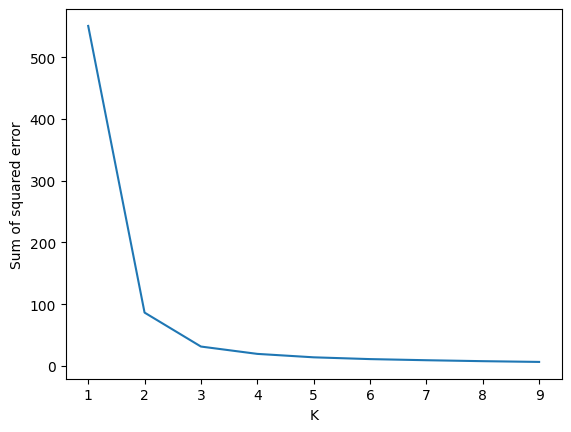

In [10]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(ks,sse)